# Title of the work

In [2]:
import pickle
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from matplotlib import rcParams
rcParams['font.size'] = 14
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### Definitions

In [3]:
folder = '/nobackup/somelocation'
class_columns = ['path_1', 'path_2', 'attack']
class_names = ['BSL', 'INBLGT', 'INBSTR', 'OOBLGT', 'OOBSTR', 'POLLGT', 'POLSTR']

### Importing dataset

In [4]:
final_dataframe = None
file_names = ['BSL', 'INBMOD', 'INBSTRONG', 'OOBMOD', 'OOBSTRONG', 'POLMODbis', 'POLSTRONG']
class_names = ['BSL', 'INBLGT', 'INBSTR', 'OOBLGT', 'OOBSTR', 'POLLGT', 'POLSTR']
for path_e in [1, 2]:
    for idc, clazz in enumerate(file_names):
        print(path_e, clazz)
        dataframe = pd.read_excel(folder + "/" + clazz + '13' + str(path_e) + '.xlsx', 'risultati', header=[0])
        dataframe = dataframe.drop(['n', 'time stamp', 'BE-FEC', 'UBE-FEC', 'OFT', 'OFT-max', 'OFT-min'], axis=1) # removing unused features
        dataframe['path_1'] = 1 if path_e == 1 else 0
        dataframe['path_2'] = 1 if path_e == 2 else 0
        dataframe['attack'] = idc
        dataframe = dataframe[~dataframe.isin([np.nan, np.inf, -np.inf]).any(1)] # remove samples with missing data
        if final_dataframe is None:
            final_dataframe = dataframe
        else:
            final_dataframe = pd.concat([final_dataframe, dataframe], ignore_index=True)

1 BSL
1 INBMOD
1 INBSTRONG
1 OOBMOD
1 OOBSTRONG
1 POLMODbis
1 POLSTRONG
2 BSL
2 INBMOD
2 INBSTRONG
2 OOBMOD
2 OOBSTRONG
2 POLMODbis
2 POLSTRONG


In [5]:
# make sure that attack column is the last one
columns = list(final_dataframe.columns)
for col in class_columns:
    columns.remove(col)
for col in class_columns:
    columns.append(col)
final_dataframe = final_dataframe[columns]
final_dataframe.describe()

,BER-FEC,BER-FEC-max,BER-FEC-min,BER-POST-FEC,BER-POST-FEC-max,BER-POST-FEC-min,LOSS,OPR,OPR-max,OPR-min,...,OSNR-min,PDL,PDL-max,PDL-min,Q-factor,Q-factor-max,Q-factor-min,path_1,path_2,attack
count,19882.000000,19882.000000,19882.000000,19882.000000,19882.000000,19882.000000,19882.0,19882.000000,19882.000000,19882.000000,...,19882.000000,19882.00000,19882.000000,19882.000000,19882.000000,19882.000000,19882.000000,19882.000000,19882.000000,19882.000000
mean,0.012379,0.017101,0.010983,0.001574,0.002586,0.000754,0.0,-10.556373,-10.533733,-10.579093,...,19.448328,0.60849,0.934011,0.462780,7.143919,7.250221,6.895393,0.500151,0.499849,3.001257
std,0.027561,0.067567,0.008499,0.003461,0.005009,0.002118,0.0,0.353269,0.353096,0.353207,...,3.307222,0.68690,1.041501,0.511276,0.787734,0.724563,1.292874,0.500013,0.500013,2.003003
min,0.002885,0.003119,0.002734,0.000000,0.000000,0.000000,0.0,-11.125000,-11.085000,-11.155000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006552,0.007758,0.005488,0.000000,0.000000,0.000000,0.0,-10.755000,-10.725000,-10.775000,...,19.169900,0.00000,0.000000,0.000000,6.700000,6.800000,6.600000,0.000000,0.000000,1.000000
50%,0.012653,0.013216,0.012376,0.000000,0.000000,0.000000,0.0,-10.635000,-10.615000,-10.655000,...,19.436800,1.00000,1.000000,0.000000,6.900000,7.000000,6.900000,1.000000,0.000000,3.000000
75%,0.014464,0.015115,0.014093,0.000718,0.000981,0.000110,0.0,-10.515000,-10.495000,-10.535000,...,21.212800,1.00000,1.000000,1.000000,7.800000,8.000000,7.600000,1.000000,1.000000,5.000000
max,1.000000,1.000000,1.000000,0.015633,0.015634,0.015301,0.0,-9.485000,-9.455000,-9.495000,...,22.369100,8.00000,8.000000,5.000000,8.800000,8.800000,8.600000,1.000000,1.000000,6.000000


### Normalizing dataset

In [13]:
raw_dataset = final_dataframe.values
X_raw_dataset = raw_dataset[:, 0:raw_dataset.shape[1] - 3].astype(float)
input_dim = X_raw_dataset.shape[1]
Y_raw_dataset = raw_dataset[:, raw_dataset.shape[1] - 3: raw_dataset.shape[1]].astype(float)

scaler = StandardScaler().fit(X_raw_dataset)
X_raw_transformed = scaler.transform(X_raw_dataset)

scaled_dataframe = pd.DataFrame(np.concatenate((X_raw_transformed, Y_raw_dataset), axis=1), columns=final_dataframe.columns)

with open(folder + '/compiled-dataset.h5', 'wb') as file:
    pickle.dump((final_dataframe, scaled_dataframe, class_columns, class_names), file)
print('done')

done


### Plotting the normalized dataset

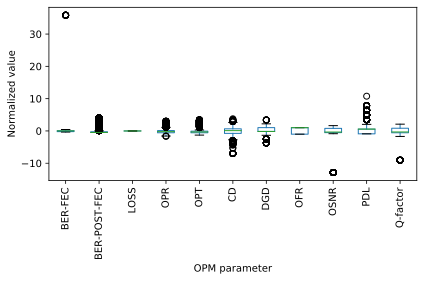

In [18]:
to_drop = []
for d in scaled_dataframe.columns:
    if 'min' in d or 'max' in d or 'path' in d or 'attack' in d:
        to_drop.append(d)
plt.figure()
scaled_dataframe.drop(to_drop, axis=1).boxplot()
ticks = plt.xticks()
plt.xticks(ticks[0], ticks[1], rotation=90)
plt.ylabel('Normalized value')
plt.xlabel('OPM parameter')
plt.grid(False)
plt.tight_layout()